# Section 1.3 - Lorentz Transformation 

The problems that lorentz transformations solve:

In [17]:
# Suggested imports (keep it consistent across notebooks)
import sympy as sp
from IPython.display import Math, display

sp.init_printing()


### Translations and boosts

A spacetime translation shifts events by a constant offset, while a boost mixes
space and time between inertial frames. Below we show the equations and a simple
1+1D visualization of both.


<IPython.core.display.Math object>

⎡ct'⎤   ⎡a_ct + ct⎤
⎢   ⎥ = ⎢         ⎥
⎣x' ⎦   ⎣ aₓ + x  ⎦

<IPython.core.display.Math object>

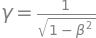

        ⎡    β⋅x           ct     ⎤
        ⎢─────────── + ───────────⎥
        ⎢   ________      ________⎥
        ⎢  ╱      2      ╱      2 ⎥
⎡ct'⎤   ⎢╲╱  1 - β     ╲╱  1 - β  ⎥
⎢   ⎥ = ⎢                         ⎥
⎣x' ⎦   ⎢   β⋅ct            x     ⎥
        ⎢─────────── + ───────────⎥
        ⎢   ________      ________⎥
        ⎢  ╱      2      ╱      2 ⎥
        ⎣╲╱  1 - β     ╲╱  1 - β  ⎦

<IPython.core.display.Math object>

        ⎡ β⋅(aₓ + x)     a_ct + ct  ⎤
        ⎢ ─────────── + ─────────── ⎥
        ⎢    ________      ________ ⎥
        ⎢   ╱      2      ╱      2  ⎥
⎡ct'⎤   ⎢ ╲╱  1 - β     ╲╱  1 - β   ⎥
⎢   ⎥ = ⎢                           ⎥
⎣x' ⎦   ⎢β⋅(a_ct + ct)     aₓ + x   ⎥
        ⎢───────────── + ───────────⎥
        ⎢    ________       ________⎥
        ⎢   ╱      2       ╱      2 ⎥
        ⎣ ╲╱  1 - β      ╲╱  1 - β  ⎦

<IPython.core.display.Math object>

⎡ct'⎤   ⎡        ct         ⎤
⎢   ⎥   ⎢                   ⎥
⎢x' ⎥   ⎢x⋅cos(θ) - y⋅sin(θ)⎥
⎢   ⎥ = ⎢                   ⎥
⎢y' ⎥   ⎢x⋅sin(θ) + y⋅cos(θ)⎥
⎢   ⎥   ⎢                   ⎥
⎣z' ⎦   ⎣         z         ⎦

In [18]:
# Equations for translation, boost, and rotation in 1+1D
ct, x = sp.symbols("ct x", real=True)
ct_p, x_p = sp.symbols("ct' x'", real=True)

a_ct, a_x = sp.symbols("a_ct a_x", real=True)
beta = sp.symbols("beta", real=True)
gamma = 1 / sp.sqrt(1 - beta**2)

X = sp.Matrix([ct, x])
A = sp.Matrix([a_ct, a_x])

# Translation: X' = X + A
translation_eq = sp.Eq(sp.Matrix([ct_p, x_p]), X + A)

display(Math(r"\textbf{Translation: }\; X' = X + A"))
display(translation_eq)

# Boost (along +x): X' = Lambda X
Lambda = sp.Matrix([
    [gamma, gamma * beta],
    [gamma * beta, gamma],
])
boost_eq = sp.Eq(sp.Matrix([ct_p, x_p]), Lambda * X)

display(Math(r"\textbf{Boost: }\; X' = \Lambda X"))
display(sp.Eq(sp.Symbol("gamma"), gamma))
display(boost_eq)

# Translation + Boost: X' = Λ (X + A)
translation_boost_eq = sp.Eq(sp.Matrix([ct_p, x_p]), Lambda * (X + A))

display(Math(r"\textbf{Translation + Boost: }\; X' = \Lambda (X + A)"))
display(translation_boost_eq)

# Spatial rotation in the (x, y) plane: X' = R_xy X
ct4, x4, y4, z4 = sp.symbols("ct x y z", real=True)
ct4_p, x4_p, y4_p, z4_p = sp.symbols("ct' x' y' z'", real=True)

theta = sp.symbols("theta", real=True)
X4 = sp.Matrix([ct4, x4, y4, z4])
R_xy = sp.Matrix([
    [1, 0, 0, 0],
    [0, sp.cos(theta), -sp.sin(theta), 0],
    [0, sp.sin(theta), sp.cos(theta), 0],
    [0, 0, 0, 1],
])
rotation_eq = sp.Eq(sp.Matrix([ct4_p, x4_p, y4_p, z4_p]), R_xy * X4)

display(Math(r"\textbf{Spatial rotation: }\; X' = R_{xy}(\theta) X"))
display(rotation_eq)

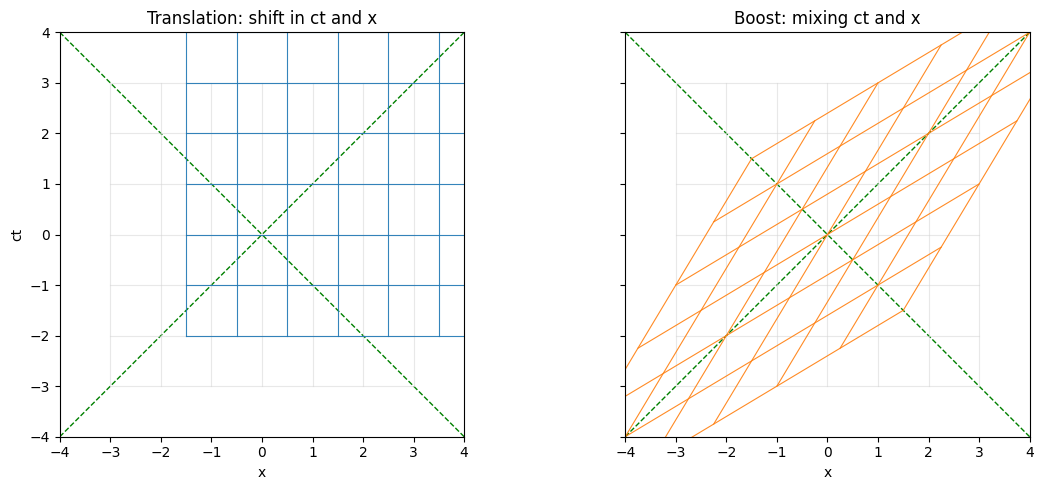

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Helpers for grids and transforms
# ----------------------------
ct_vals = np.linspace(-3, 3, 7)
x_vals = np.linspace(-3, 3, 7)
line = np.linspace(-4, 4, 200)


def draw_light_cone(ax):
    ax.plot(line, line, color="green", linestyle="--", linewidth=1)
    ax.plot(line, -line, color="green", linestyle="--", linewidth=1)


def draw_grid(ax, transform=None, color="lightgray", linewidth=0.8, alpha=0.7):
    for ct in ct_vals:
        x_line = np.linspace(x_vals.min(), x_vals.max(), 200)
        ct_line = np.full_like(x_line, ct)
        if transform is None:
            ct_t, x_t = ct_line, x_line
        else:
            ct_t, x_t = transform(ct_line, x_line)
        ax.plot(x_t, ct_t, color=color, linewidth=linewidth, alpha=alpha)

    for x in x_vals:
        ct_line = np.linspace(ct_vals.min(), ct_vals.max(), 200)
        x_line = np.full_like(ct_line, x)
        if transform is None:
            ct_t, x_t = ct_line, x_line
        else:
            ct_t, x_t = transform(ct_line, x_line)
        ax.plot(x_t, ct_t, color=color, linewidth=linewidth, alpha=alpha)


def translation_transform(a_ct, a_x):
    def _transform(ct, x):
        return ct + a_ct, x + a_x
    return _transform


def boost_transform(beta):
    gamma = 1.0 / np.sqrt(1 - beta**2)

    def _transform(ct, x):
        ct_p = gamma * (ct + beta * x)
        x_p = gamma * (beta * ct + x)
        return ct_p, x_p
    return _transform


# ----------------------------
# Visualization
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Translation panel
ax = axes[0]
draw_light_cone(ax)
draw_grid(ax, color="lightgray", alpha=0.5)
translate = translation_transform(a_ct=1.0, a_x=1.5)
draw_grid(ax, transform=translate, color="tab:blue", alpha=0.9)
ax.set_title("Translation: shift in ct and x")

# Boost panel
ax = axes[1]
draw_light_cone(ax)
draw_grid(ax, color="lightgray", alpha=0.5)
boost = boost_transform(beta=0.6)
draw_grid(ax, transform=boost, color="tab:orange", alpha=0.9)
ax.set_title("Boost: mixing ct and x")

for ax in axes:
    ax.set_xlabel("x")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect("equal")

axes[0].set_ylabel("ct")

plt.tight_layout()
plt.show()


### Rapidities and colinear boosts

Rapidity $\phi$ parameterizes a boost so that
$\beta = v/c = \tanh \phi$, $\gamma = \cosh \phi$, and $\gamma\beta = \sinh \phi$.
In 1+1D the boost matrix becomes a hyperbolic rotation:
$$
\Lambda(\phi) =
\begin{bmatrix}
\cosh \phi & \sinh \phi \\
\sinh \phi & \cosh \phi
\end{bmatrix}.
$$
For colinear boosts (same spatial axis), rapidities add. If frame A to B is
$\phi_1$ and frame B to C is $\phi_2$, then the net boost is
$\phi_{AC} = \phi_1 + \phi_2$.

Diagram (colinear boosts add):

```
ct
^           ct_C
|          /
|   ct_B  /
|    /   /
|   /   /
|  /   /
| /   /
|/___/____________> x
    x_B  x_C
```

Rapidities cannot be added as simple scalars when boosts are not colinear.
In 2+1 or 3+1 dimensions, composing non-parallel boosts produces a boost
*plus* a spatial rotation (Thomas–Wigner rotation), so you must use full
velocity-addition formulas and track the rotation separately.

Diagram (non-colinear boosts do **not** add):

```
A -> B: boost along +x
B -> C: boost along +y

      +y
      ^
      |
      |    C
      |
      |
      +------> +x
           B

(net transformation = boost + rotation)
```


### Spatial rotation (x–y plane)

A spatial rotation mixes the spatial axes while leaving ct unchanged. This is a
proper Lorentz transformation because it preserves the Minkowski metric.


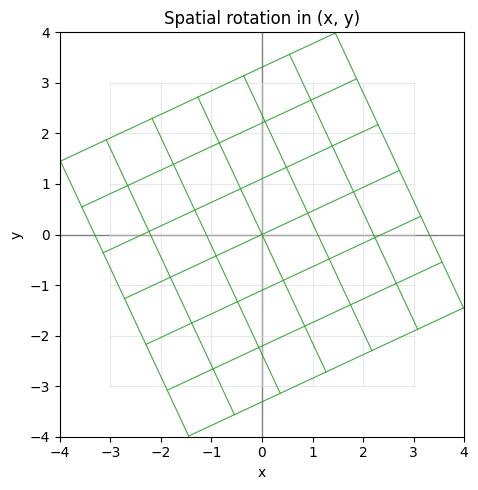

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Spatial rotation in the (x, y) plane
# ----------------------------
x_vals = np.linspace(-3, 3, 7)
y_vals = np.linspace(-3, 3, 7)


def draw_grid_xy(ax, transform=None, color="lightgray", linewidth=0.8, alpha=0.7):
    for x in x_vals:
        y_line = np.linspace(y_vals.min(), y_vals.max(), 200)
        x_line = np.full_like(y_line, x)
        if transform is None:
            x_t, y_t = x_line, y_line
        else:
            x_t, y_t = transform(x_line, y_line)
        ax.plot(x_t, y_t, color=color, linewidth=linewidth, alpha=alpha)

    for y in y_vals:
        x_line = np.linspace(x_vals.min(), x_vals.max(), 200)
        y_line = np.full_like(x_line, y)
        if transform is None:
            x_t, y_t = x_line, y_line
        else:
            x_t, y_t = transform(x_line, y_line)
        ax.plot(x_t, y_t, color=color, linewidth=linewidth, alpha=alpha)


def rotation_transform(theta):
    c, s = np.cos(theta), np.sin(theta)

    def _transform(x, y):
        x_p = c * x - s * y
        y_p = s * x + c * y
        return x_p, y_p
    return _transform


fig, ax = plt.subplots(figsize=(6, 5))

# Original grid
ax.axhline(0, color="gray", linewidth=1)
ax.axvline(0, color="gray", linewidth=1)
draw_grid_xy(ax, color="lightgray", alpha=0.5)

# Rotated grid
rot = rotation_transform(theta=np.deg2rad(25))
draw_grid_xy(ax, transform=rot, color="tab:green", alpha=0.9)

ax.set_title("Spatial rotation in (x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect("equal")

plt.tight_layout()
plt.show()


### Lorentz group check

A proper Lorentz transformation must satisfy $\Lambda^T \eta \Lambda = \eta$ and
have $\det\Lambda = +1$. A spatial rotation leaves $ct$ unchanged and preserves
$\eta$, so it *is* a member of the proper Lorentz group. The check below shows
this explicitly.


In [21]:
# Verify whether the spatial rotation is Lorentz
eta = sp.diag(-1, 1, 1, 1)  # 3+1D Minkowski metric

rotation_check = sp.simplify(R_xy.T * eta * R_xy - eta)

display(Math(r"R_{xy}(\theta)^T\eta R_{xy}(\theta) - \eta ="))
display(rotation_check)

display(Math(r"\det R_{xy}(\theta) ="))
display(sp.simplify(R_xy.det()))

print("Is proper Lorentz?", rotation_check == sp.zeros(4) and sp.simplify(R_xy.det()) == 1) 


<IPython.core.display.Math object>

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

<IPython.core.display.Math object>

Is proper Lorentz? True


### Combined translation + boost + rotation

Here the grid is translated, then boosted (along +x), and finally spatially
rotated in the x–y plane to show how these operations compose in sequence.


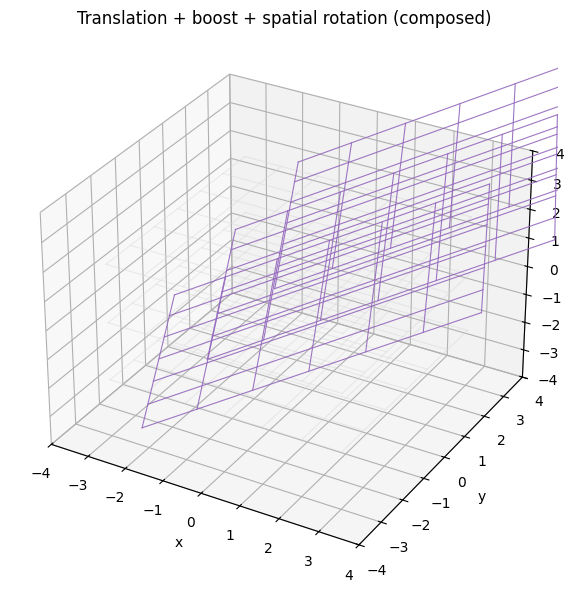

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Combined translation + boost + spatial rotation (x-y)
# ----------------------------
ct_levels = [-2.0, 0.0, 2.0]
x_vals = np.linspace(-3, 3, 7)
y_vals = np.linspace(-3, 3, 7)


def plot_grid_xy(ax, ct0, transform=None, color="lightgray", linewidth=0.8, alpha=0.7):
    for x in x_vals:
        y_line = np.linspace(y_vals.min(), y_vals.max(), 200)
        x_line = np.full_like(y_line, x)
        ct_line = np.full_like(y_line, ct0)
        if transform is None:
            ct_t, x_t, y_t = ct_line, x_line, y_line
        else:
            ct_t, x_t, y_t = transform(ct_line, x_line, y_line)
        ax.plot(x_t, y_t, ct_t, color=color, linewidth=linewidth, alpha=alpha)

    for y in y_vals:
        x_line = np.linspace(x_vals.min(), x_vals.max(), 200)
        y_line = np.full_like(x_line, y)
        ct_line = np.full_like(x_line, ct0)
        if transform is None:
            ct_t, x_t, y_t = ct_line, x_line, y_line
        else:
            ct_t, x_t, y_t = transform(ct_line, x_line, y_line)
        ax.plot(x_t, y_t, ct_t, color=color, linewidth=linewidth, alpha=alpha)


def translation_boost_rotate(a_ct, a_x, a_y, beta, theta):
    gamma = 1.0 / np.sqrt(1 - beta**2)
    c, s = np.cos(theta), np.sin(theta)

    def _transform(ct, x, y):
        ct_t = ct + a_ct
        x_t = x + a_x
        y_t = y + a_y
        ct_b = gamma * (ct_t + beta * x_t)
        x_b = gamma * (beta * ct_t + x_t)
        y_b = y_t
        x_r = c * x_b - s * y_b
        y_r = s * x_b + c * y_b
        return ct_b, x_r, y_r
    return _transform


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Original grid slices
for ct0 in ct_levels:
    plot_grid_xy(ax, ct0, color="lightgray", alpha=0.4)

# Transformed grid slices
combo = translation_boost_rotate(a_ct=0.8, a_x=1.2, a_y=0.6, beta=0.6, theta=np.deg2rad(25))
for ct0 in ct_levels:
    plot_grid_xy(ax, ct0, transform=combo, color="tab:purple", alpha=0.9)

ax.set_title("Translation + boost + spatial rotation (composed)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("ct")
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)

plt.tight_layout()
plt.show()


## Matrix viewpoint: why rapidities add

A Lorentz boost along the $x$-direction can be written in matrix form as

$$
\Lambda(\phi) =
\begin{pmatrix}
\cosh \phi & -\sinh \phi \\
-\sinh \phi & \cosh \phi
\end{pmatrix}
$$

where $\phi$ is the **rapidity**.



### Composition of boosts

Suppose we apply two boosts along the same direction:

- First boost with rapidity $\phi_1$
- Second boost with rapidity $\phi_2$

The combined transformation is the matrix product

$$
\Lambda(\phi_2)\,\Lambda(\phi_1)
$$

Carrying out the multiplication gives

$$
\Lambda(\phi_2)\,\Lambda(\phi_1)
=
\begin{pmatrix}
\cosh(\phi_1+\phi_2) & -\sinh(\phi_1+\phi_2) \\
-\sinh(\phi_1+\phi_2) & \cosh(\phi_1+\phi_2)
\end{pmatrix}
$$

This is **exactly the same form** as a single boost with rapidity $\phi_1 + \phi_2$.


### Result

$$
\boxed{
\Lambda(\phi_2)\,\Lambda(\phi_1) = \Lambda(\phi_1 + \phi_2)
}
$$

Therefore:

- **Rapidity is additive**
- Boosts along the same direction compose like rotations
- Rapidity is the natural group parameter of Lorentz boosts
